In [1]:
import pandas as pd

In [2]:
import numpy as np 
import matplotlib.pyplot as ply
import seaborn as sns 
%matplotlib inline

In [3]:
columns_names = ['user_id','item_id','rating','timestamp']

In [5]:
df = pd.read_csv('u.data',sep='\t',names=columns_names)

In [6]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [7]:
movie_titles = pd.read_csv('Movie_Id_Titles')

In [10]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [11]:
df = pd.merge(df,movie_titles,on ='item_id')

In [12]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [68]:
sns.set_style('white')

In [72]:
df.groupby('title')['rating'].mean().sort_values(ascending =False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [19]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [20]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [21]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [79]:
ratings["num of ratings"] = pd.DataFrame(df.groupby('title')['rating'].count())

In [80]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


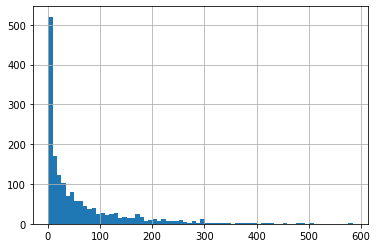

In [31]:
ratings['num of ratings'].hist(bins=70)

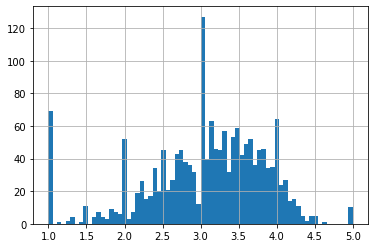

In [34]:
ratings['rating'].hist(bins=70)

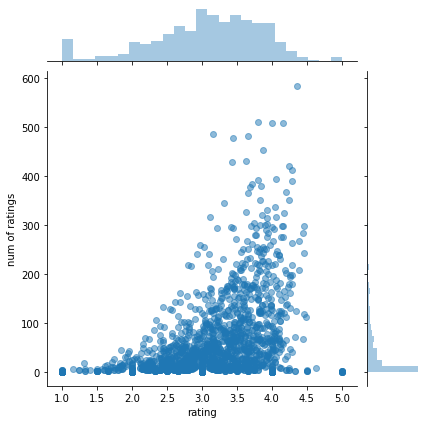

In [40]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=.5)

In [41]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [42]:
movie_mat = df.pivot_table(index='user_id',columns='title',values ='rating')

In [43]:
movie_mat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
ratings.sort_values('num of ratings',ascending=False).head()

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [45]:
starwars_user_ratings = movie_mat['Star Wars (1977)']
liarliar_user_ratings = movie_mat['Liar Liar (1997)']

In [46]:
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [48]:
similar_to_starwars = movie_mat.corrwith(starwars_user_ratings)

In [49]:
similar_to_liarliar = movie_mat.corrwith(liarliar_user_ratings)

In [51]:
corr_starwars = pd.DataFrame(similar_to_starwars ,columns=['corelation'])
corr_starwars.dropna(inplace=True)


In [52]:
corr_starwars.head()

,corelation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [88]:
corr_starwars.sort_values('corelation',ascending=False)

,corelation,num of ratings
title,,
Commandments (1997),1.000000,3
Cosi (1996),1.000000,4
No Escape (1994),1.000000,5
Stripes (1981),1.000000,5
Man of the Year (1995),1.000000,9
Hollow Reed (1996),1.000000,6
"Beans of Egypt, Maine, The (1994)",1.000000,2
"Good Man in Africa, A (1994)",1.000000,2
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.000000,5


In [55]:
corr_starwars=corr_starwars.join(ratings['num of ratings'])

In [56]:
corr_starwars.head()

,corelation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [59]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('corelation',ascending=False).head()

,corelation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [60]:
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['correlation'])

In [61]:
corr_liarliar.head()

,correlation
title,
'Til There Was You (1997),0.118913
1-900 (1994),NaN
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145


In [62]:
corr_liarliar.dropna(inplace = True)

In [63]:
corr_liarliar = corr_liarliar.join(ratings['num of ratings'])

In [65]:
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('correlation',ascending = False).head()

,correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


In [82]:
fargo_user_ratings=movie_mat['Fargo (1996)']

In [84]:
similar_to_fargo = movie_mat.corrwith(fargo_user_ratings)

In [86]:
corr_fargo = pd.DataFrame(similar_to_fargo,columns=['Correlation'])

In [87]:
corr_fargo.head()

,Correlation
title,
'Til There Was You (1997),0.100000
1-900 (1994),0.866025
101 Dalmatians (1996),-0.245368
12 Angry Men (1957),0.098676
187 (1997),0.142509


In [89]:
corr_fargo.dropna(inplace=True)

In [90]:
corr_fargo = corr_fargo.join(ratings['num of ratings'])

In [91]:
corr_fargo.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.100000,9
1-900 (1994),0.866025,5
101 Dalmatians (1996),-0.245368,109
12 Angry Men (1957),0.098676,125
187 (1997),0.142509,41


In [98]:
corr_fargo[corr_fargo['num of ratings']>200].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Fargo (1996),1.000000,508
"People vs. Larry Flynt, The (1996)",0.341784,215
Stand by Me (1986),0.332730,227
Amadeus (1984),0.308669,276
2001: A Space Odyssey (1968),0.299882,259


In [99]:
contact_movie_rating = movie_mat['Contact (1997)']

In [100]:
contact_movie_rating.head()

user_id
0    NaN
1    5.0
2    3.0
3    2.0
4    5.0
Name: Contact (1997), dtype: float64

In [101]:
similar_to_contact = movie_mat.corrwith(contact_movie_rating)

In [102]:
corr_contact = pd.DataFrame(similar_to_contact,columns=['Correlation'])

In [103]:
corr_contact.head()

,Correlation
title,
'Til There Was You (1997),0.904534
1-900 (1994),NaN
101 Dalmatians (1996),-0.108441
12 Angry Men (1957),0.022265
187 (1997),0.135512


In [106]:
corr_contact.dropna(inplace =True)


In [107]:
corr_contact = corr_contact.join(ratings['num of ratings'])

In [111]:
corr_contact[corr_contact['num of ratings'] >100].sort_values('Correlation',ascending =False).head()

,Correlation,num of ratings
title,,
Contact (1997),1.000000,509
Philadelphia (1993),0.446509,137
"Mask, The (1994)",0.418328,129
Young Guns (1988),0.388839,101
Sling Blade (1996),0.384840,136
